<a href="https://colab.research.google.com/github/jraval/DS-Unit-2-Linear-Models/blob/master/JAY_RAVAL_of_LS_DSPT9_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [4]:
%%capture
import sys
!pip install dash==1.17.0

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
pd.set_option('display.max_rows', 500)

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
#View dataframe to determine features

In [ ]:
df.head(20)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2.0,1,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,40.7427,-73.9957,5645,155 West 21st Street,low,1,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
8,1.0,1,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,40.8234,-73.9457,1725,63 Hamilton Terrace,medium,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2.0,4,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,40.7278,-73.9808,5800,522 E 11th,low,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
#Picked longitude and latitude as features, was determining dataset parameters 
#when I realized I needed to filter df by date
df_long = df['longitude']
df_long_max = df_long.max()
print(f'Maximum of longitude:  {df_long_max}')
df_long_min = df_long.min()
print(f'Minimum of longitude:  {df_long_min}')

df_lat = df['latitude']
df_lat_max = df_lat.max()
print(f'Maximum of latitude:  {df_lat_max}')
df_lat_min = df_lat.min()
print(f'Minimum of latitude: {df_lat_min}')     


Maximum of longitude:  -73.7001
Minimum of longitude:  -74.0873
Maximum of latitude:  40.9894
Minimum of latitude: 40.5757


In [ ]:
df.dtypes#wanted to see the datatypes if I needed to change anything

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [12]:
#filtered dataframe, created train, test subsets
train = df[(df['created'] >= '2016-04-01') & (df['created'] <= '2016-05-31')]
test = df[(df['created'] >= '2016-06-01') & (df['created'] <= '2016-06-30')]
print(train.sample(10))
test.sample(10)

       bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
42132        1.0         0  ...                 0                    0
30042        2.0         2  ...                 0                    0
44395        1.0         3  ...                 0                    0
28060        3.0         3  ...                 0                    0
3953         1.0         1  ...                 0                    0
2146         2.0         2  ...                 1                    0
24887        1.0         0  ...                 0                    0
30778        3.0         4  ...                 1                    0
3219         2.0         2  ...                 0                    0
38795        1.0         2  ...                 0                    0

[10 rows x 34 columns]


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
22890,1.0,2,2016-06-11 05:37:23,PARK AVE .. HUGE 2 BR .. 800 SQFT W PRIVATE BA...,East 34th Street,40.7469,-73.9802,3400,115 East 34th Street,high,1,1,1,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
21599,1.0,0,2016-06-08 13:31:59,Best priced studio downtown! Full-service prew...,West Street,40.7104,-74.0142,2395,90 West Street,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
19545,1.0,1,2016-06-16 08:22:02,Located in Manhattan and steps away from the c...,East 39th Street,40.7476,-73.9732,4025,300 East 39th Street,low,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
13661,1.0,2,2016-06-01 02:28:48,***NO FEE - 1 MONTH FREE!!! X LARGE CONVERTIBL...,W 37 St.,40.7568,-73.9982,3250,505 W 37 St.,low,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0
25406,2.0,3,2016-06-14 02:21:45,"This impressive 3 bedroom, 2 bath apartment ha...",W 57 St.,40.7709,-73.9917,4610,601 W 57 St.,low,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
21433,2.0,3,2016-06-16 07:48:25,Massive newly renovated 3 bedroom. Features M...,Seventh Avenue,40.7639,-73.9808,11900,853 Seventh Avenue,low,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18947,1.0,2,2016-06-03 01:46:41,MUST SEE-RENOVATED 2 BEDROOMS-BEAUTIFUL 2 BEDR...,Madison Street,40.7120,-73.9951,2500,110 Madison Street,low,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18370,1.0,0,2016-06-07 21:33:48,A FABULOUS STUDIO IN THE UPPER WEST SIDE!\r\r ...,UPPER WEST STUDIO STEAL!!!,40.8005,-73.9657,1850,AMSTERDAM & W 106,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17065,1.0,3,2016-06-15 14:57:19,This beautiful convertible 3 apartment is spac...,West St,40.7078,-74.0114,4200,West St,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20222,1.0,0,2016-06-22 01:28:45,*Just Listed* Fully Furnished Studio available...,West 16th Street,40.7376,-73.9938,2795,16 West 16th Street,low,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train.sample(10)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
8188,1.0,1,2016-04-02 16:48:57,This newly renovated one bedroom apartment fea...,Broadway,40.7041,-74.0128,3600,Broadway,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
37045,1.0,2,2016-05-20 05:25:34,<p><a website_redacted,Jackson Avenue,40.7471,-73.9416,3000,26-14 Jackson Avenue,medium,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4984,1.0,0,2016-04-07 02:18:20,"This bright, spacious studio apartment home fe...",West 26th Street,40.7448,-73.9909,3617,55 West 26th Street,low,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
364,1.0,2,2016-04-30 03:58:30,Nestled in a modern low rise in prime Murray H...,E 33 Street,40.7447,-73.9774,3495,221 E 33 Street,medium,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1578,1.0,1,2016-04-08 06:22:16,"This is a spacious, unique north facing apartm...",West 31st Street,40.7471,-73.9867,3500,9 West 31st Street,medium,1,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0
33013,1.0,2,2016-05-12 03:53:55,Great chance for anyone looking for a True 2 b...,East 11th Street,40.7274,-73.9787,2895,611 East 11th Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3295,1.0,1,2016-04-21 04:27:39,one bedroom,21 monitor,40.7198,-73.9419,2850,21 monitor,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45488,1.0,1,2016-04-13 02:16:32,***Lease Break with the option to renew***High...,260 West 54th Street,40.7645,-73.9840,3500,260 West 54th Street,low,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
37880,1.0,1,2016-05-03 04:57:09,"NO FEE - Open houses all week, call 193-438-44...",East 97th Street,40.7881,-73.9548,3295,6 East 97th Street,low,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4188,1.0,1,2016-04-03 03:06:07,Stunning One Bedroom Home Featuring: -Modern K...,Mott Street,40.7242,-73.9946,3375,283 Mott Street,low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#how many rows?
train.shape, test.shape

((31839, 34), (16973, 34))

In [53]:
print('train price average')
train['price'].mean()

train price average


3575.737743019567

In [54]:
print('test price average')
test['price'].mean()

test price average


3587.0546750721733

In [17]:
# Arrange y target vectors
target = 'price'
y_train = train[target]
y_test = test[target]


In [18]:
#Get the mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()
guess

Mean Baseline (using 0 features)


3575.737743019567

In [19]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess]*len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error(40.5757-40.8077): {mae: .2f} price error')

Train Error(40.5757-40.8077):  1201.97 price error


In [20]:
# Test Error

y_pred = [guess]*len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error(40.8078-40.9894): {mae: .2f} price error')

Test Error(40.8078-40.9894):  1197.75 price error


In [29]:
#Make a scatter plot of price data
px.scatter(
    train,
    x='latitude',
    y='price',
    #text ='created',
    title ='Real Estate Rentals in NYC',
    trendline='ols',
    trendline_color_override = 'red'
)

In [28]:
#Make a scatter plot of price data with a random sample as it's difficult to see 
#the trend line with entire train dataset 
px.scatter(
    train.sample(100),
    x='latitude',
    y='price',
    #text ='created',
    title ='Real Estate Rentals in NYC',
    trendline='ols',
    trendline_color_override = 'red'
)

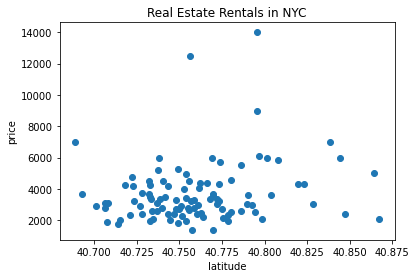

In [30]:
#Same as above using matplotlib
latitude_var = train['latitude'].sample(100)
price_var = train['price'].sample(100)
# plotting the points  
plt.scatter(latitude_var, price_var) 
  
# naming the x axis 
plt.xlabel('latitude') 
# naming the y axis 
plt.ylabel('price') 
  
# giving a title to my graph 
plt.title('Real Estate Rentals in NYC') 


# function to show the plot 
plt.show() 

In [36]:
#Step 1 - Import the appropriate estimator class from Scikit-Learn(Based on the five-step process by Jake Van der Plas)
from sklearn.linear_model import LinearRegression

In [37]:
#Step 2 - Instantiate this class
model = LinearRegression()

In [38]:
#Step 3 - Arrange X features matrix and y target vector(3 featuresfeatured)
features = ['longitude', 'latitude']

print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_test = test[features]

X_train

Linear Regression, dependent on: ['longitude', 'latitude']


,longitude,latitude
2,-74.0018,40.7388
3,-73.9677,40.7539
4,-73.9493,40.8241
5,-74.0028,40.7429
6,-73.9660,40.8012
...,...,...
49346,-73.9869,40.7296
49348,-74.0163,40.7102
49349,-73.9900,40.7601
49350,-74.0101,40.7066


In [39]:
#Step 4. Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae: .2f} error amount')

Train Error:  1147.24 error amount


In [40]:
# TODO: Apply the model to new data

# 5. Apply the model to new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae: .2f} error')

Test Error:  1139.73 error


The error is larger for train data than for the test data.  The error is getting smaller compared to the first model

# **Multiple Regression(2 Features)**

In [41]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

"""
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
"""

def regression_3d_1(df, x, y, z, num=100, **kwargs):
    #Plot Data
    fig = px.scatter_3d(df, x, y, z, **kwargs)


    #Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])

    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))

    #Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T

    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))

    return fig

In [50]:
#Multiple Regression no plane large sample
px.scatter_3d(
    train,
    x='longitude', 
    y='price', 
    z='latitude', 
    #text='Year', 
    title='NYC Rental Prices'
)

In [51]:
#Multiple Regression no plane small sample
px.scatter_3d(
    train.sample(100),
    x='longitude', 
    y='price', 
    z='latitude', 
    #text='Year', 
    title='NYC Rental Prices'
)

In [55]:
# TODO: Complete this cell

# Re-arrange X features matrices
features = ['latitude', 
            'longitude']

print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_test = test[features]

X_train

Linear Regression, dependent on: ['latitude', 'longitude']


,latitude,longitude
2,40.7388,-74.0018
3,40.7539,-73.9677
4,40.8241,-73.9493
5,40.7429,-74.0028
6,40.8012,-73.9660
...,...,...
49346,40.7296,-73.9869
49348,40.7102,-74.0163
49349,40.7601,-73.9900
49350,40.7066,-74.0101


In [59]:
# 4. Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} error')

Train Error: 1147.24 error


In [60]:
# TODO: Apply the model to new data

# 5. Apply the model to new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} error')

Test Error: 1139.73 error


The error is larger for train data than for the test data. The error is getting smaller compared to the first model

In [56]:
#Multiple Regression with plane
regression_3d_1(
    train,
    z = 'latitude',
    y = 'price',
    x = 'longitude',
    text = 'bedrooms',
    title = 'Rents in NYC'
    
)

In [57]:
#Same thing, smaller sample
regression_3d_1(
    train.sample(100),
    z = 'latitude',
    y = 'price',
    x = 'longitude',
    text = 'bedrooms',
    title = 'Rents in NYC'   
)

In [43]:
model.intercept_

-1285832.1973824392

In [44]:
model.coef_

array([-16215.39213421,   2206.31282353])

In [45]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y = {beta0} + {beta1}x1 + {beta2}x2')

y = -1285832.1973824392 + -16215.392134208692x1 + 2206.312823525256x2


In [61]:
#Easier to read...
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept -1285832.1973824396
latitude      2206.312824
longitude   -16215.392134


Longitude is negative, because it began as negative because it's west of the Prime Meridian.

---



In [68]:
model.predict([[0,0]])

array([-1285832.19738244])

In [69]:
model.predict([[1,0]])

array([-1283625.88455891])

In [70]:
model.predict([[1,0]]) - model.predict([[0,0]])

array([2206.31282353])

In [71]:
model.predict([[2,0]])

array([-1281419.57173539])

In [85]:
from matplotlib.patches import Rectangle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# MAE, MSE mean square error, RMSE Root Mean Square Error
def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear equation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3105368.1988804364
Root Mean Squared Error: 1762.2054928073617
Mean Absolute Error: 1201.9731808995773
R^2: 0.0


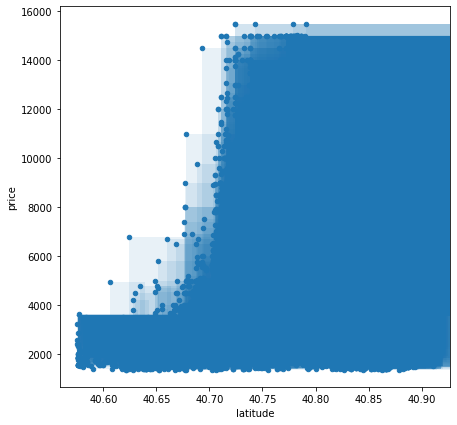

In [75]:
feature = 'latitude'

squared_errors(train, feature, target, m=0, b=y_train.mean())


Mean Squared Error: 3105368.1988804364
Root Mean Squared Error: 1762.2054928073617
Mean Absolute Error: 1201.9731808995773
R^2: 0.0


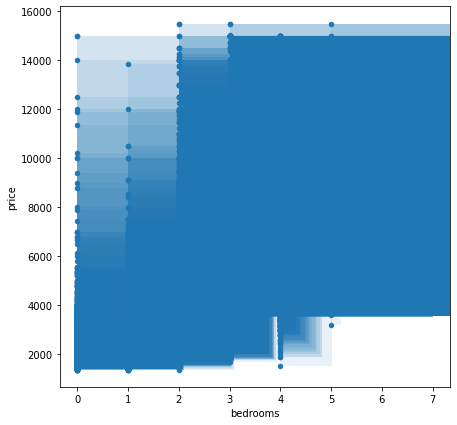

In [86]:
feature = 'bedrooms'

squared_errors(train, feature, target, m=0, b=y_train.mean())

In [77]:
y_train.mean()

3575.737743019567

Mean Squared Error: 3391584.6280785394
Root Mean Squared Error: 1841.6255395922753
Mean Absolute Error: 1141.6794834982254
R^2: -0.0921682746996928


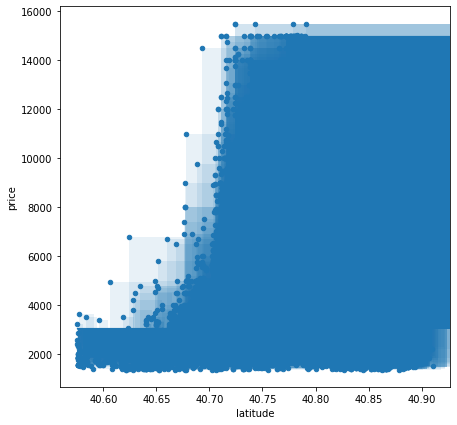

In [84]:
feature = 'latitude'
squared_errors(train, feature, target, m=1, b= 3000)

In [65]:
#def squared_errors(df, feature, target, m, b):
"""
  Visualize linear regression with squared errors,
  in 2D: 1 feature + 1 target.

  Use the m & b parameters to "fit the model" manually

  df: Pandas DataFrame
  feature: string, feature column in df
  target: string, target column in df
  m : numeric, slope for linear equation
  b : numeric, intercept for linear equation
"""

'\n  Visualize linear regression with squared errors,\n  in 2D: 1 feature + 1 target.\n\n  Use the m & b parameters to "fit the model" manually\n\n  df: Pandas DataFrame\n  feature: string, feature column in df\n  target: string, target column in df\n  m : numeric, slope for linear equation\n  b : numeric, intercept for linear equation\n'

In [ ]:
def pred_model():
  y_pred = model.predict([[longitude]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  print(int(estimate), 'is our estimated price for', int(longitude), 'factoring the longitude in nyc')